# Assignment-12 Logistic Regression

## Problem Statement

I decided to treat this as a classification problem by creating a new binary variable `affair` (did the woman have at least one affair?) and trying to predict the classification for each woman.

## Dataset

The dataset I chose is the affairs dataset that comes with Statsmodels. It was derived from a survey of women in 1974 by Redbook magazine, in which married women were asked about their participation in extramarital affairs. More information about the study is available in a 1978 paper from the Journal of Political Economy.

## Description of Variables

The dataset contains 6366 observations of 9 variables:

* `rate_marriage`: woman's rating of her marriage (1 = very poor, 5 = very good)
* `age`: woman's age
* `yrs_married`: number of years married
* `children`: number of children
* `religious`: woman's rating of how religious she is (1 = not religious, 4 = strongly religious)
* `educ`: level of education (9 = grade school, 12 = high school, 14 = some college, 16 = college graduate, 17 = some graduate school, 20 = advanced degree)
* `occupation`: woman's occupation (1 = student, 2 = farming/semi-skilled/unskilled, 3 = "white collar", 4 = teacher/nurse/writer/technician/skilled, 5 = managerial/business, 6 = professional with advanced degree)
* `occupation_husb`: husband's occupation (same coding as above)
* `affairs`: time spent in extra-marital affairs

In [3]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.model_selection import cross_val_score
dta = sm.datasets.fair.load_pandas().data
# add "affair" column: 1 represents having affairs, 0 represents not
dta['affair'] = (dta.affairs > 0).astype(int)
y, X = dmatrices('affair ~ rate_marriage + age + yrs_married + children + \
 religious + educ + C(occupation) + C(occupation_husb)',
 dta, return_type="dataframe")

In [5]:
# Data Exploration
dta.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666,1


In [8]:
dta.groupby('affair').mean()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
affair,,,,,,,,,
0,4.329701,28.390679,7.989335,1.238813,2.504521,14.322977,3.405286,3.833758,0.000000
1,3.647345,30.537019,11.152460,1.728933,2.261568,13.972236,3.463712,3.884559,2.187243


In [9]:
dta.groupby('rate_marriage').mean()

,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs,affair
rate_marriage,,,,,,,,,
1.0,33.823232,13.914141,2.308081,2.343434,13.848485,3.232323,3.838384,1.201671,0.747475
2.0,30.471264,10.727011,1.735632,2.330460,13.864943,3.327586,3.764368,1.615745,0.635057
3.0,30.008056,10.239174,1.638469,2.308157,14.001007,3.402820,3.798590,1.371281,0.550856
4.0,28.856601,8.816905,1.369536,2.400981,14.144514,3.420161,3.835861,0.674837,0.322926
5.0,28.574702,8.311662,1.252794,2.506334,14.399776,3.454918,3.892697,0.348174,0.181446


Above shows that `age` , `yrs_married` and `children` is inversely proportional to `rate_marriage`

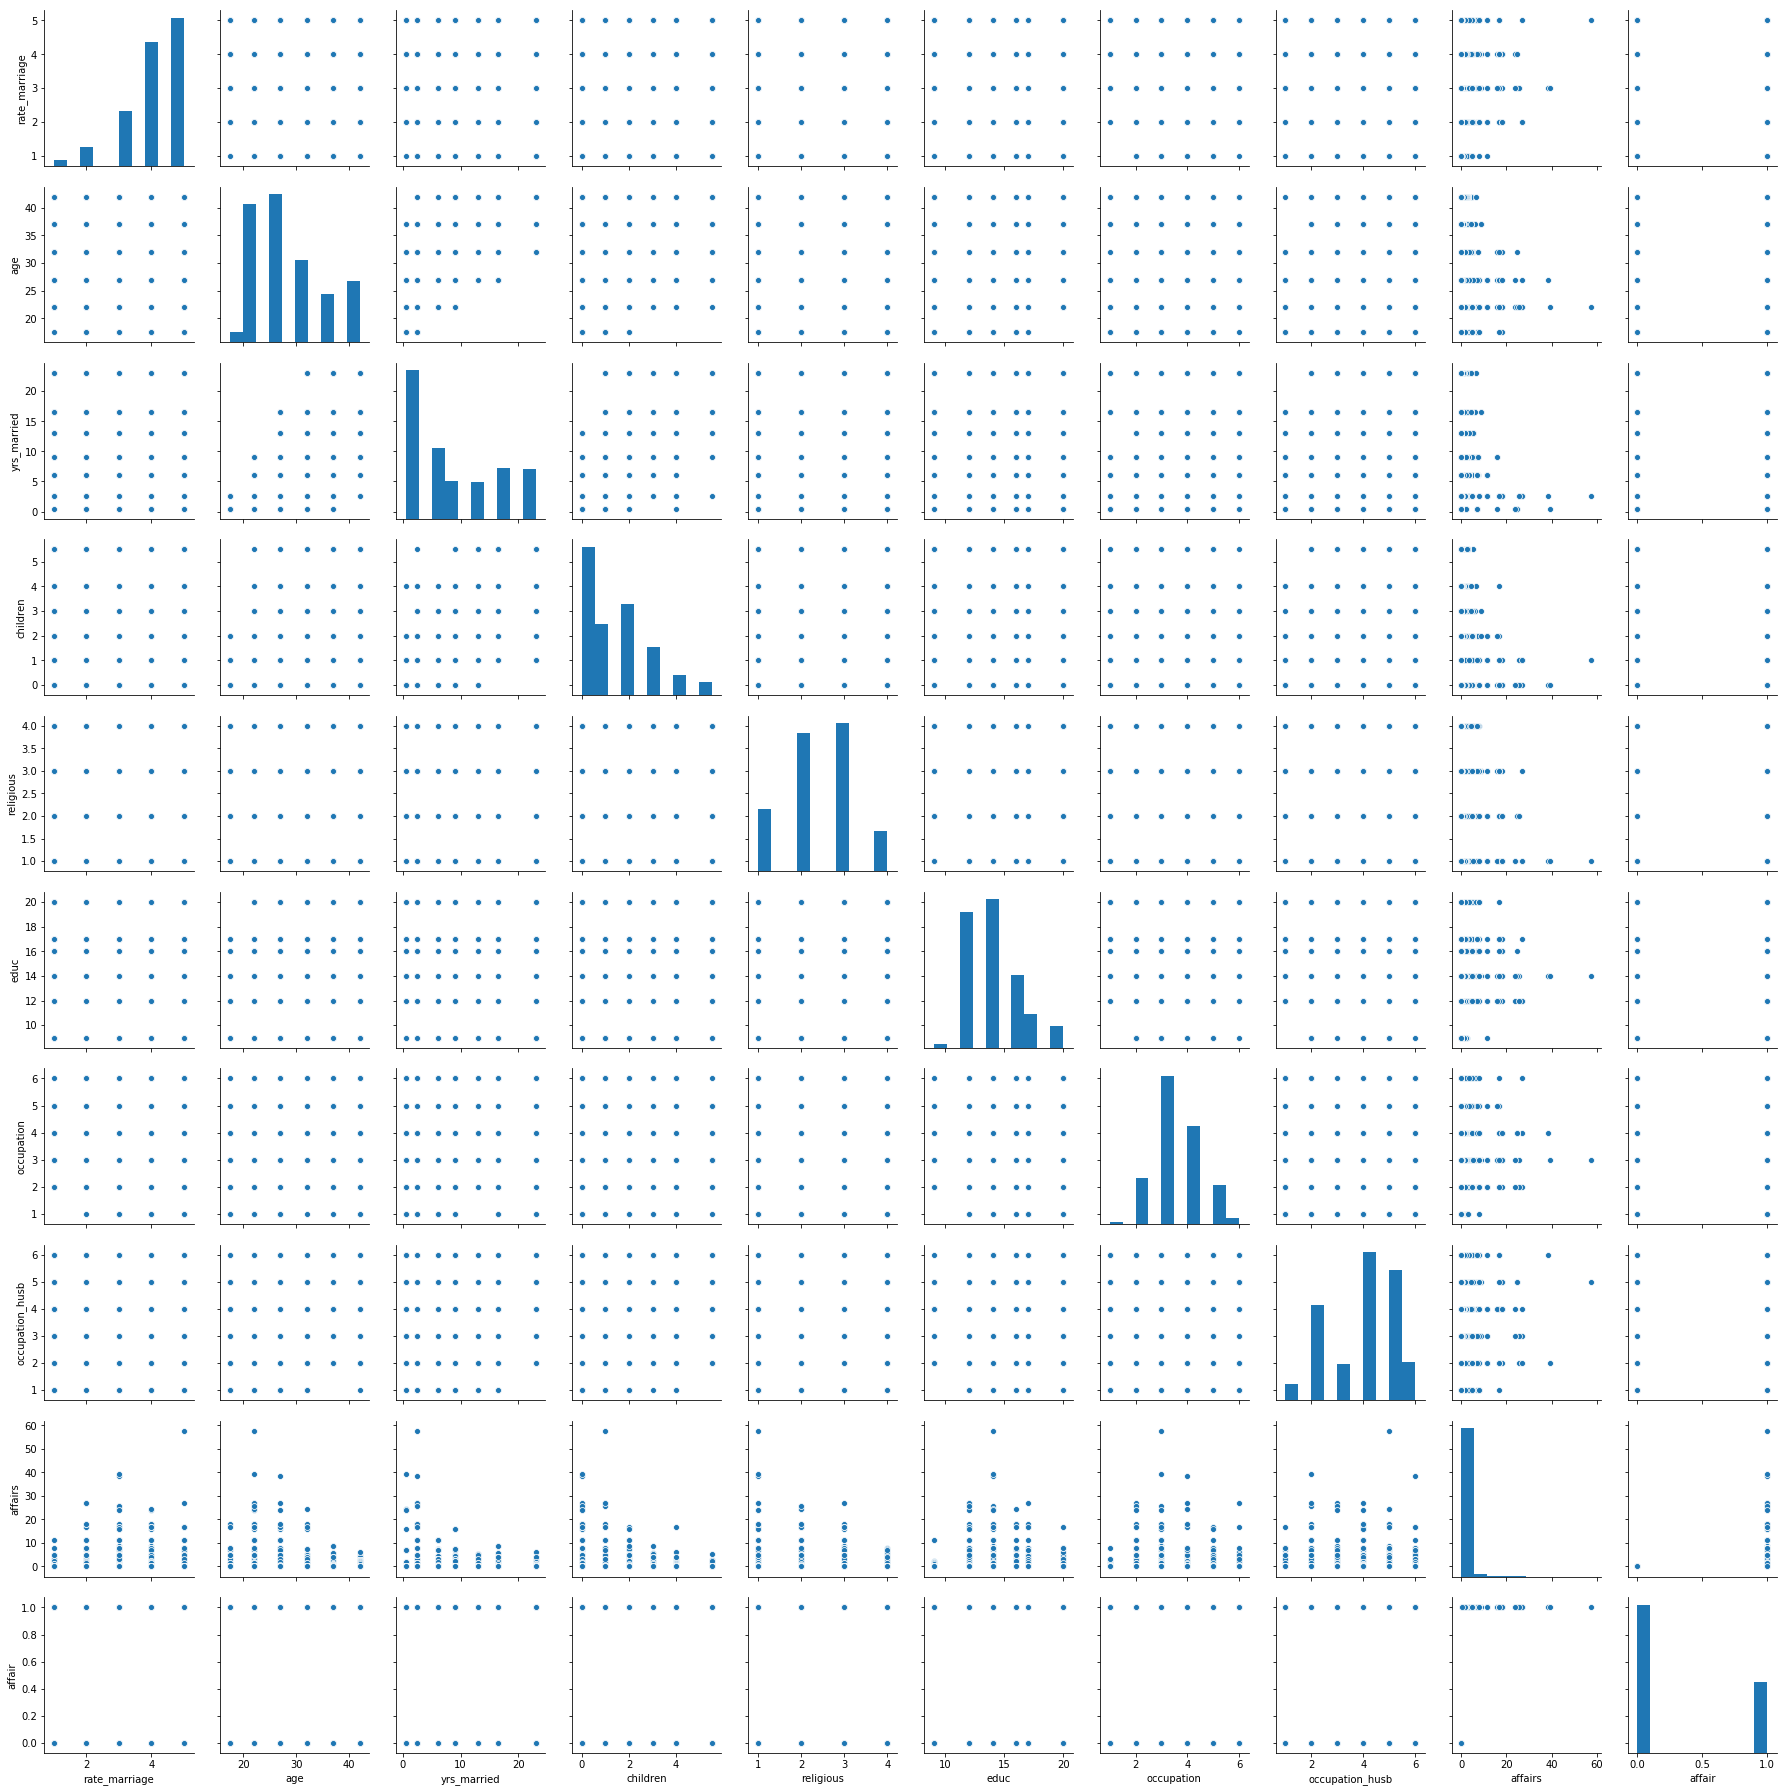

In [5]:
#Lets check if we can get insights from plots
import seaborn as sns
sns.pairplot(dta)

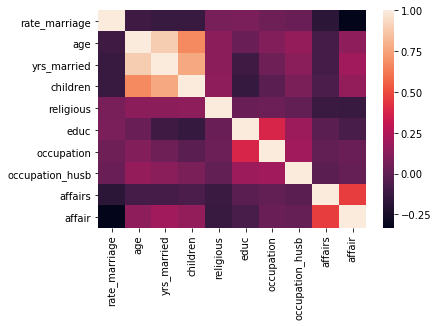

In [6]:
sns.heatmap(dta.corr())

In [8]:
X.columns

Index(['Intercept', 'C(occupation)[T.2.0]', 'C(occupation)[T.3.0]',
       'C(occupation)[T.4.0]', 'C(occupation)[T.5.0]', 'C(occupation)[T.6.0]',
       'C(occupation_husb)[T.2.0]', 'C(occupation_husb)[T.3.0]',
       'C(occupation_husb)[T.4.0]', 'C(occupation_husb)[T.5.0]',
       'C(occupation_husb)[T.6.0]', 'rate_marriage', 'age', 'yrs_married',
       'children', 'religious', 'educ'],
      dtype='object')

### Rename the columns in X and flatten y

In [4]:
X = X.rename(columns = {'C(occupation)[T.2.0]':'occ_2',
                        'C(occupation)[T.3.0]':'occ_3',
                        'C(occupation)[T.4.0]':'occ_4',
                        'C(occupation)[T.5.0]':'occ_5',
                        'C(occupation)[T.6.0]':'occ_6',
                        'C(occupation_husb)[T.2.0]':'occ_husb_2',
                        'C(occupation_husb)[T.3.0]':'occ_husb_3',
                        'C(occupation_husb)[T.4.0]':'occ_husb_4',
                        'C(occupation_husb)[T.5.0]':'occ_husb_5',
                        'C(occupation_husb)[T.6.0]':'occ_husb_6'})
y=np.ravel(y)

## Logistic Regression

Let's go ahead and run logistic regression on the entire data set, and see how accurate it is!

In [12]:
# instantiate a logistic regression model, and fit with X and y
model = LogisticRegression(solver='lbfgs',max_iter=20000)
model = model.fit(X, y)

# check the accuracy on the training set
model.score(X, y)

0.726358781024191

73% accuracy seems good, but what's the null error rate?

In [39]:
# what percentage had affairs?
y.mean()

0.32249450204209867

Only 32% of the women had affairs, which means that you could obtain 68% accuracy by always predicting "no". So we're doing better than the null error rate, but not by much.

Let's examine the coefficients to see what we learn.

In [41]:
# examine the coefficients
X.columns, np.transpose(model.coef_)

(Index(['Intercept', 'occ_2', 'occ_3', 'occ_4', 'occ_5', 'occ_6', 'occ_husb_2',
        'occ_husb_3', 'occ_husb_4', 'occ_husb_5', 'occ_husb_6', 'rate_marriage',
        'age', 'yrs_married', 'children', 'religious', 'educ'],
       dtype='object'), array([[ 1.48986215],
        [ 0.18804152],
        [ 0.49891971],
        [ 0.25064099],
        [ 0.83897693],
        [ 0.8340083 ],
        [ 0.19057989],
        [ 0.29777984],
        [ 0.16135349],
        [ 0.18771784],
        [ 0.19394847],
        [-0.70311586],
        [-0.05841769],
        [ 0.10567657],
        [ 0.01692027],
        [-0.37113376],
        [ 0.00401557]]))

Increases in marriage rating and religiousness correspond to a decrease in the likelihood of having an affair. For both, wife's occupation and the husband's occupation, the lowest likelihood of having an affair corresponds to the baseline occupation (student), since all of the dummy coefficients are positive.

## Model Evaluation Using a Validation Set

So far, we have trained and tested on the same set. Let's instead split the data into a training set and a testing set.

In [15]:
# evaluate the model by splitting into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
model2 = LogisticRegression(solver='lbfgs',max_iter=20000,n_jobs=5)
model2.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=20000, multi_class='warn',
          n_jobs=5, penalty='l2', random_state=None, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

We now need to predict class labels for the test set. We will also generate the class probabilities, just to take a look.

In [16]:
# predict class labels for the test set
predicted = model2.predict(X_test)
predicted

array([1., 0., 0., ..., 0., 1., 1.])

In [17]:
# generate class probabilities
probs = model2.predict_proba(X_test)
probs

array([[0.34852144, 0.65147856],
       [0.91011934, 0.08988066],
       [0.73502061, 0.26497939],
       ...,
       [0.77913677, 0.22086323],
       [0.37770773, 0.62229227],
       [0.36222113, 0.63777887]])

As you can see, the classifier is predicting a 1 (having an affair) any time the probability in the second column is greater than 0.5.

Now let's generate some evaluation metrics.

In [18]:
# generate evaluation metrics
print(metrics.accuracy_score(y_test, predicted))
print(metrics.roc_auc_score(y_test, probs[:, 1]))

0.7349246231155779
0.7483887657058388


The accuracy is 73%, which is the same as we experienced when training and predicting on the same data.

We can also see the confusion matrix and a classification report with other metrics.

In [22]:
print(metrics.confusion_matrix(y_test, predicted))
print(metrics.classification_report(y_test, predicted))

[[994 106]
 [316 176]]
              precision    recall  f1-score   support

         0.0       0.76      0.90      0.82      1100
         1.0       0.62      0.36      0.45       492

   micro avg       0.73      0.73      0.73      1592
   macro avg       0.69      0.63      0.64      1592
weighted avg       0.72      0.73      0.71      1592



## Model Evaluation Using Cross-Validation

Now let's try 20-fold cross-validation, to see if the accuracy holds up more rigorously.

In [21]:
# evaluate the model using 10-fold cross-validation
scores = cross_val_score(LogisticRegression(solver='lbfgs',max_iter=20000,n_jobs=5), X, y, scoring='accuracy', cv=20)
scores, scores.mean()

(array([0.71473354, 0.72413793, 0.70219436, 0.70219436, 0.7460815 ,
        0.73040752, 0.70846395, 0.69905956, 0.69592476, 0.71473354,
        0.70846395, 0.7523511 , 0.72100313, 0.74763407, 0.7192429 ,
        0.68454259, 0.72870662, 0.77917981, 0.75709779, 0.73817035]),
 0.7237161674396527)

Looks good. It's still performing at 72% accuracy.